In [1]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df  = pd.read_excel("/content/drive/MyDrive/Topics in IEOR/Insurance-claim-data.xlsx")
df.sort_values(by = ['Amount'])
df

,Amount
0,14121
1,37800
2,23769
3,64668
4,245000
...,...
4949,36828
4950,1947
4951,32695
4952,68951


In [3]:
print(df['Amount'].mean())
df.shape[0]

43578.87807832055


4954

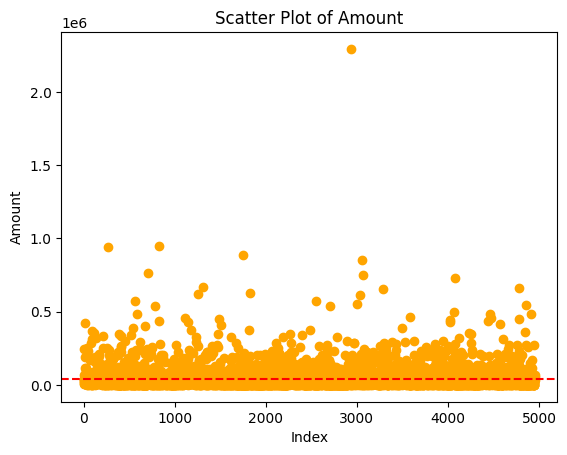

In [4]:

plt.axhline(y=df['Amount'].mean(), color='red', linestyle='--', label='Mean Amount')
plt.scatter(df.index, df['Amount'], color ='orange')
plt.xlabel('Index')
plt.ylabel('Amount')
plt.title('Scatter Plot of Amount')
plt.show()

this is the scatter plot of the Claim Amount and it clearly shows that most of the amount are in the **range of 12000 to 30000**  but as we know there is inflation  duue to which some amount are above that and roughly we can there can be some outliers.
lets plot the scatter plot of lognorm transformation of the claim amount.

In [5]:
data = pd.DataFrame({'Amount': df['Amount'].apply(np.log)})
data


,Amount
0,9.555418
1,10.540064
2,10.076137
3,11.077022
4,12.409013
...,...
4949,10.514014
4950,7.574045
4951,10.394977
4952,11.141151


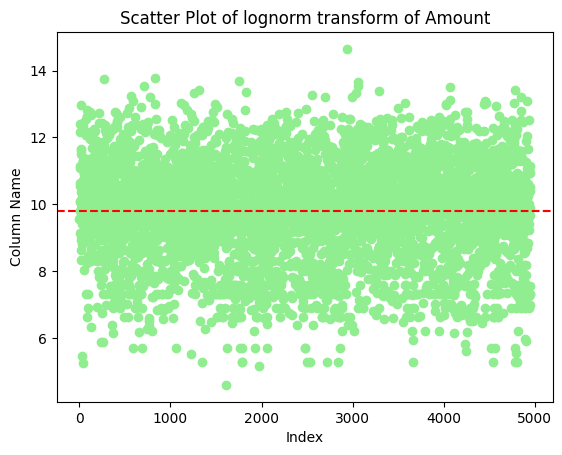

In [6]:
import matplotlib.pyplot as plt
plt.axhline(y=data['Amount'].mean(), color='red', linestyle='--', label='Mean Amount')
plt.scatter(data.index, data['Amount'], color = 'lightgreen')
plt.xlabel('Index')
plt.ylabel('Column Name')
plt.title('Scatter Plot of lognorm transform of Amount')
plt.show()

we can see that there is **vey few points that are away from** the mean value of claim amount.



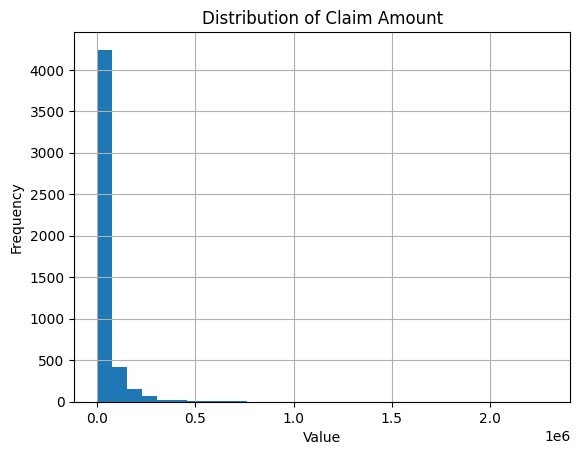

In [7]:
df['Amount'].hist(bins=30)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of Claim Amount')
plt.show()

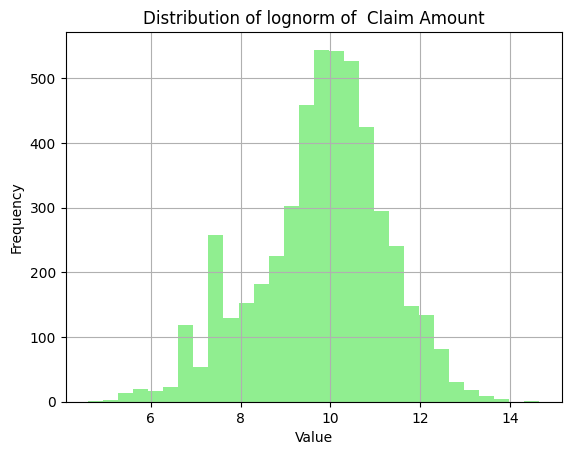

In [8]:
data['Amount'].hist(bins=30, color ='lightgreen')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of lognorm of  Claim Amount')
plt.show()

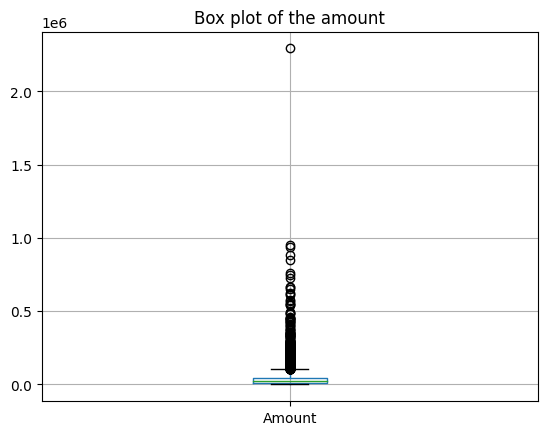

In [9]:
df.boxplot()
plt.title("Box plot of the amount")
plt.show()


Here we can say there is definitely one outlier available in the data, there are many points that lies above the 1.5x of interquartile range.

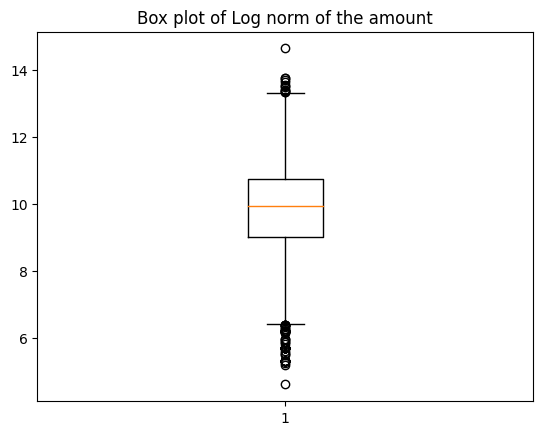

In [10]:
plt.boxplot(data['Amount'])
plt.title("Box plot of Log norm of the amount")
plt.show()

we can see that tranformed data is well dispersed, there are points that are above 1.5x of inter quartile range of the data  but they are in acceptaable limits except 2, one we have already disscussed above and one i.e. minimum claim amount.

In [11]:
!pip install fitter

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 25.8 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1


In [12]:
from fitter import Fitter

In [13]:

f = Fitter(df['Amount'], distributions=['genpareto' , 'norm', 'expon', 'lognorm', 'gamma', 'beta', 'norm', 'expon', 'lognorm', 'gamma', 'beta',  't', 'uniform', 'weibull_min', 'poisson','cauchy', 'chi2',  'exponpow', 'gamma',  'powerlaw', 'rayleigh'])
f.fit()

# Step 3: Print summary of best fits
#f.summary()

# Step 4: Get the best distribution
print("Best fit distribution:", f.get_best())

# Plot the best fit distribution
# f.plot_pdf()

Best fit distribution: {'genpareto': {'c': 0.37975962691921983, 'loc': 99.99967268396705, 'scale': 27018.334759216377}}


In [14]:
f.get_best()

{'genpareto': {'c': 0.37975962691921983,
  'loc': 99.99967268396705,
  'scale': 27018.334759216377}}

these are  top5 best fitted distribution to the Claim amount.
---

/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
genpareto,3.622896e-12,3945.151043,3964.674894,inf,0.037775,1.407111e-06
lognorm,3.942061e-12,3801.262521,3820.786373,inf,0.055527,1.021071e-13
cauchy,1.352064e-11,3776.596169,3789.612070,inf,0.217207,1.130832e-205
t,2.009433e-11,3884.441232,3903.965084,inf,0.209807,8.639254e-192
weibull_min,2.684124e-11,4988.500186,5008.024038,inf,0.050916,1.333751e-11


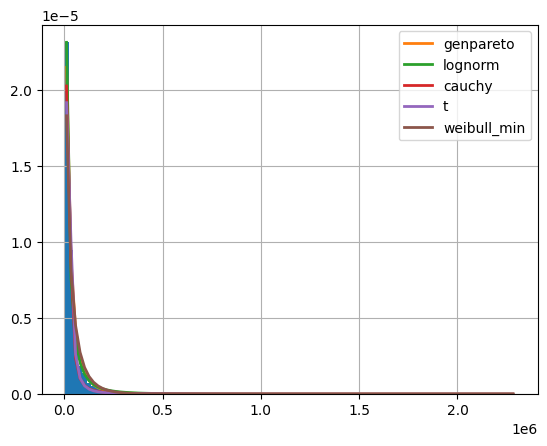

In [15]:
f.summary()

we can see the best fitted distribution to this data is **general pareto** because it shows the **least sumsquare error, AIC value, BIC value and KS P value**

In [16]:
stats.lognorm.fit(df['Amount'])

(1.3723484621462094, -278.51006665552944, 18925.51439967527)

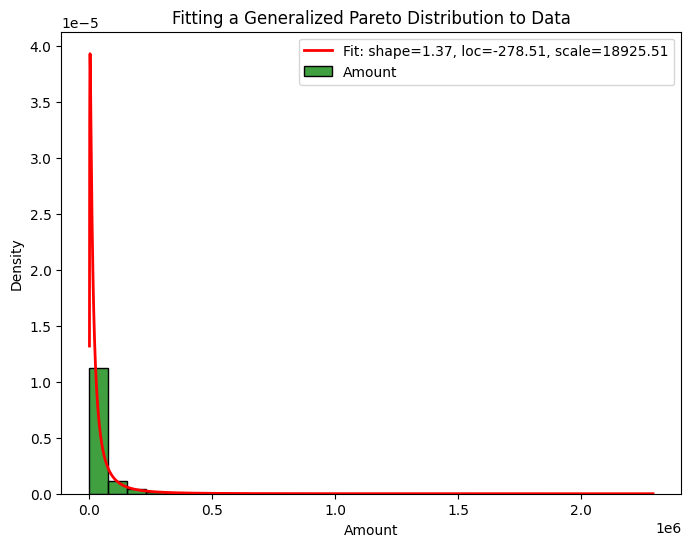

In [17]:
shape, loc, scale = stats.lognorm.fit(df['Amount'])
x = np.linspace(min(df['Amount']), max(df['Amount']), df.shape[0])
#0.37975962691921983 , 99.99967268396705, 27018.334759216377

p = stats.lognorm.pdf(x, shape, loc=loc, scale=scale)


plt.figure(figsize=(8, 6))


sns.histplot(df['Amount'], bins=30, kde=False, stat="density", color='green', label='Amount')

plt.plot(x, p, 'r', linewidth=2, label=f'Fit: shape={shape:.2f}, loc={loc:.2f}, scale={scale:.2f}')
plt.title('Fitting a Generalized Pareto Distribution to Data')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:716: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:721: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  a, b = optimize.fsolve(func, (1.0, 1.0))
/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:6554: RuntimeWarning: overflow encountered in divide
  return np.sum((1 + np.log(shifted/scale)/shape**2)/shifted)


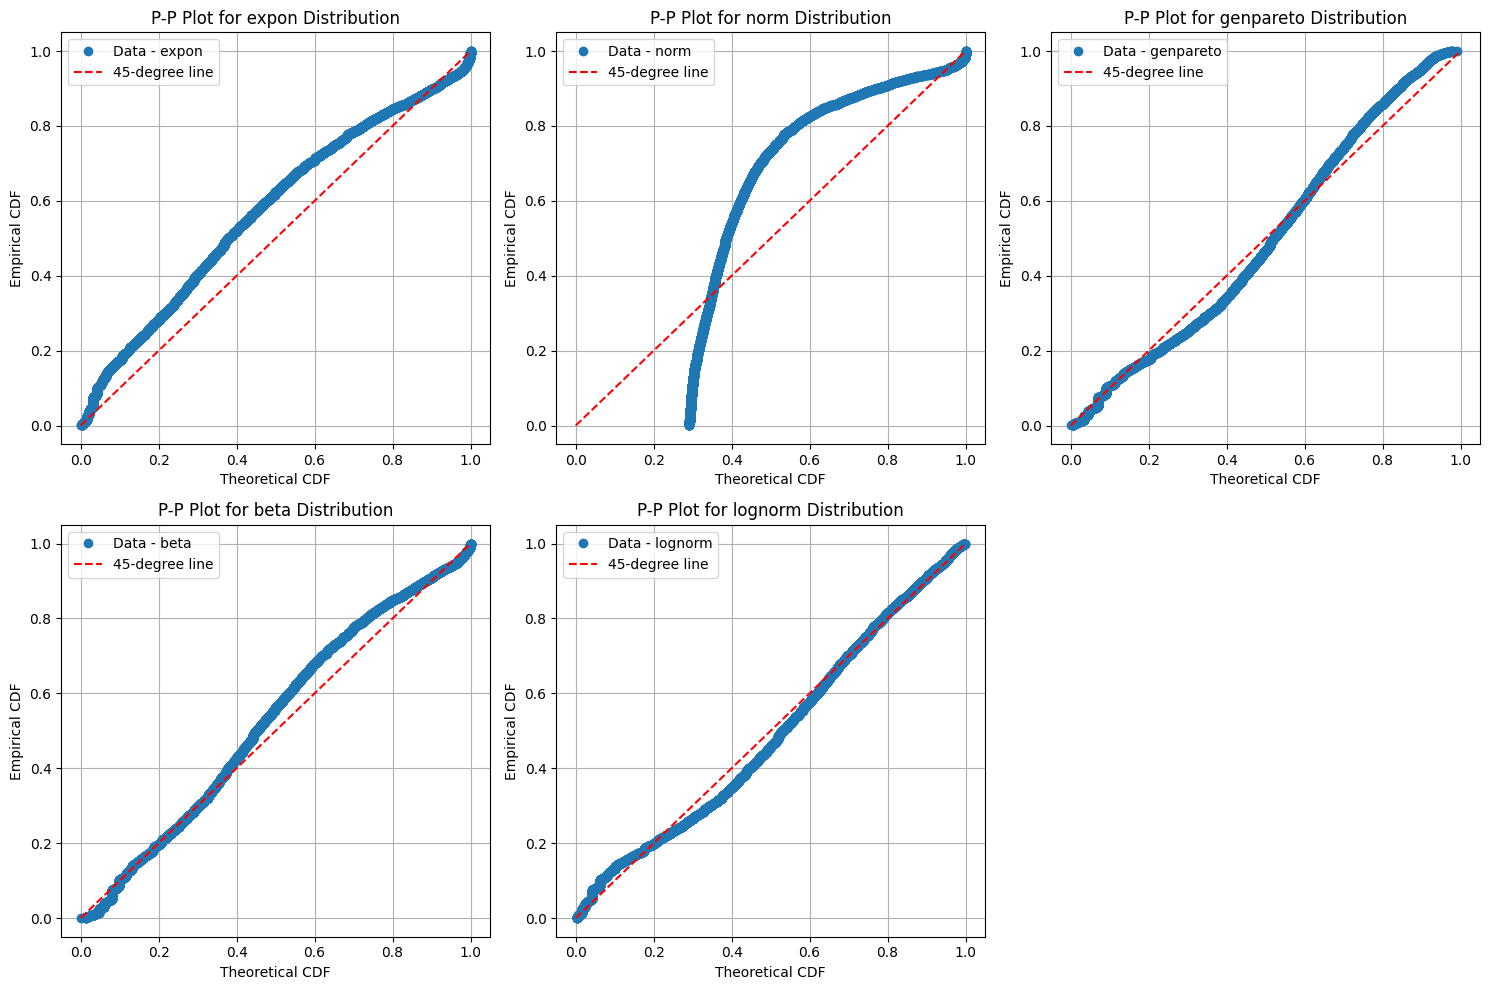

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

def get_pp_fit(data, distributions):

    # Normalize the data if required
    normalized_data = (data - data.min()) / (data.max() - data.min())

    # Sort data for empirical CDF calculation
    data_sorted = np.sort(normalized_data)
    ecdf = np.arange(1, len(data_sorted) + 1) / len(data_sorted)

    # Set up the plot figure
    plt.figure(figsize=(15, 10))

    # Loop through each distribution to generate P-P plots
    for i, dist_name in enumerate(distributions):
        dist = getattr(stats, dist_name)

        # Step 1: Fit the distribution
        params = dist.fit(normalized_data)

        # Step 2: Generate the theoretical CDF based on the fitted parameters
        theoretical_cdf = dist.cdf(data_sorted, *params)

        # Step 3: Create the P-P plot
        plt.subplot(2, 3, i+1)  # Adjust the grid for subplot (5 plots in 2 rows)
        plt.plot(theoretical_cdf, ecdf, 'o', label=f'Data - {dist_name}')
        plt.plot([0, 1], [0, 1], 'r--', label='45-degree line')  # 45-degree reference line
        plt.title(f'P-P Plot for {dist_name} Distribution')
        plt.xlabel("Theoretical CDF")
        plt.ylabel("Empirical CDF")
        plt.grid(True)
        plt.legend()

    # Adjust layout and show the plots
    plt.tight_layout()
    plt.show()


data = df['Amount']

# List of distributions to plot P-P plots for
distributions = ['expon', 'norm', 'genpareto', 'beta', 'lognorm']

# Generate the P-P plots
get_pp_fit(data, distributions)


Here we can see that **beta, genpareto and log norm distribition fits quite well**, to select one among them we need to look at **qq plot** of each.

In [19]:

def get_qq_fit(data, distributions):

    # Normalize the data if required
    normalized_data = (data - data.min()) / (data.max() - data.min())

    # Sort data for empirical quantile calculation
    data_sorted = np.sort(normalized_data)

    # Set up the plot figure
    plt.figure(figsize=(15, 10))

    # Loop through each distribution to generate Q-Q plots
    for i, dist_name in enumerate(distributions):
        dist = getattr(stats, dist_name)

        # Step 1: Fit the distribution
        params = dist.fit(normalized_data)

        # Step 2: Generate the theoretical quantiles based on the fitted parameters
        theoretical_quantiles = dist.ppf(np.linspace(0.01, 0.99, len(data_sorted)), *params)

        # Step 3: Create the Q-Q plot
        plt.subplot(2, 3, i+1)  # Adjust the grid for subplot (5 plots in 2 rows)
        plt.plot(theoretical_quantiles, data_sorted, 'o', label=f'Data - {dist_name}')
        plt.plot([data_sorted.min(), data_sorted.max()], [data_sorted.min(), data_sorted.max()], 'r--', label='45-degree line')  # 45-degree reference line
        plt.title(f'Q-Q Plot for {dist_name} Distribution')
        plt.xlabel("Theoretical Quantiles")
        plt.ylabel("Empirical Quantiles")
        plt.grid(True)
        plt.legend()

    # Adjust layout and show the plots
    plt.tight_layout()
    plt.show()



/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:716: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:721: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  a, b = optimize.fsolve(func, (1.0, 1.0))
/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:6554: RuntimeWarning: overflow encountered in divide
  return np.sum((1 + np.log(shifted/scale)/shape**2)/shifted)


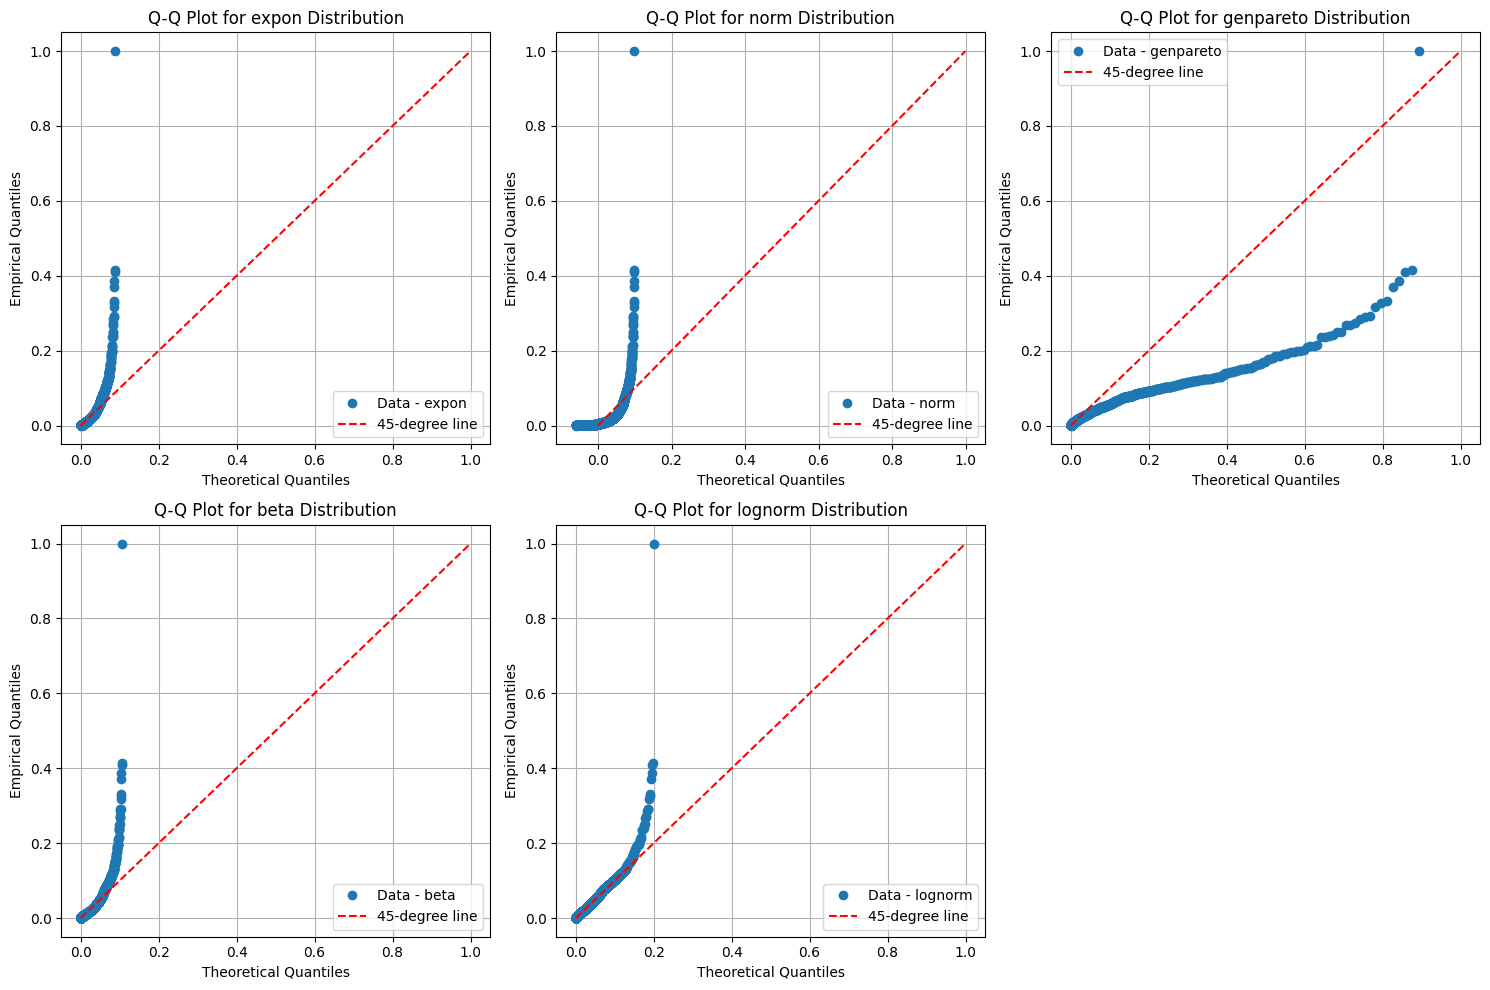

In [20]:

data = df['Amount']

# List of distributions to plot Q-Q plots for
distributions = ['expon', 'norm', 'genpareto', 'beta', 'lognorm']

# Generate the Q-Q plots
get_qq_fit(data, distributions)


Here we can  visually determine that **genpareto is having best QQ plot** and hence it is the **best fittted distribtion** among all.::

also we can see that none of the above fitted very well so i think we need to fit different distrubtion to the tail and the body.

Question 2)


*   seperating LV and HV by threshold based approach (theresold = 75th percentile data point)



In [21]:

!pip install kneed

In [22]:
df  = pd.read_excel("/content/drive/MyDrive/Topics in IEOR/Insurance-claim-data.xlsx")


In [23]:
df.sort_values(by = ['Amount'])

,Amount
1605,100
1968,178
41,190
2527,200
1788,200
...,...
3057,850000
1750,885366
270,938775
825,950000


split on basis of percentile

In [24]:
threshold = np.percentile(df, 75)
df['category'] = np.where(df['Amount'] <= threshold, 'LV', 'HV')


df_lv = df[df['category'] == 'LV']
df_hv = df[df['category'] == 'HV']

# Print some information
print(f"Threshold value: {threshold}")
print(f"Number of LV claims: {len(df_lv)}")
print(f"Number of HV claims: {len(df_hv)}")

#  remove the 'category' column from the split DataFrames
df_lv = df_lv.drop('category', axis=1)
df_hv = df_hv.drop('category', axis=1)
df = df.drop('category', axis = 1)


Threshold value: 46068.75
Number of LV claims: 3715
Number of HV claims: 1239


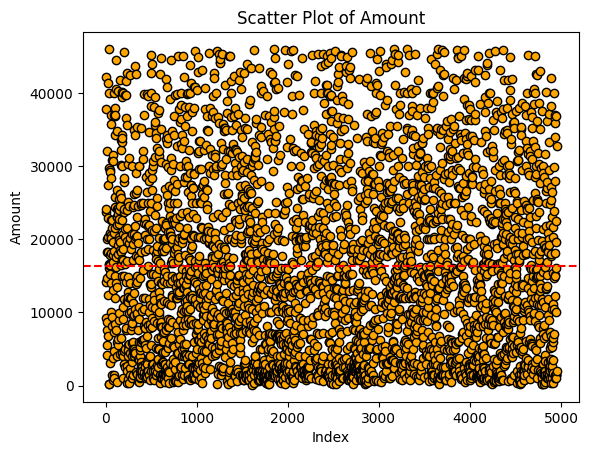

In [25]:
plt.axhline(y=df_lv['Amount'].mean(), color='red', linestyle='--', label='Mean Amount')
plt.scatter(df_lv.index, df_lv['Amount'], edgecolor = 'black', color ='orange')
plt.xlabel('Index')
plt.ylabel('Amount')
plt.title('Scatter Plot of Amount')
plt.show()
# plt.savefig(f"scatterplot when percentile .png")


here we can see that lower values of amount is well dispersed.

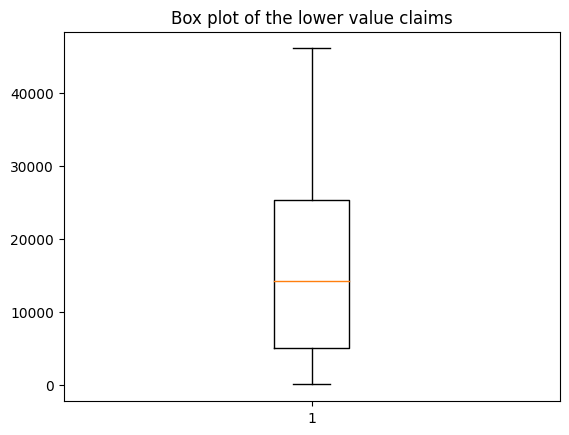

In [26]:
plt.boxplot(df_lv["Amount"])
plt.title("Box plot of the lower value claims")
plt.show()

from this box plot we can see that lowest value of the claim amount is 0 and the maximum vcalue of clim amount is 46068.75 i.e 75th percentile and the median lies around 15000, also there is no outlier in the data.

<Axes: >

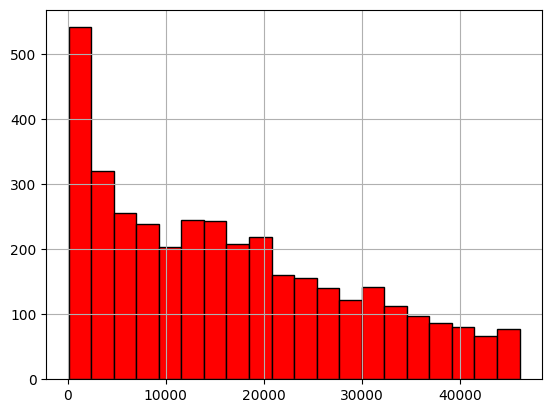

In [27]:
df_lv['Amount'].hist(bins =20, color ='red',edgecolor ='black')

this is the histogram of the values of the lower value of the claim amount.

In [28]:

f = Fitter(df_lv['Amount'], distributions=['norm', 'expon', 'lognorm', 'gamma', 'beta', 'genpareto', 't', 'uniform', 'weibull_min', 'poisson','cauchy', 'chi2',  'exponpow', 'gamma',  'powerlaw', 'rayleigh'])

# Step 2: Fit the data
f.fit()

# # Step 3: Print summary of best fits
# f.summary()

# Step 4: Get the best distribution based on the fit
best_fit = f.get_best()
print("Best fit distribution:", best_fit)

# Step 5: Plot the probability density function (PDF) of the best fit distribution
# f.plot_pdf()


Best fit distribution: {'beta': {'a': 0.9410257963258515, 'b': 1.8555348498024826, 'loc': 99.99999999999999, 'scale': 48174.11018297453}}



These are the top 5 best fitted distribution the lower value of claim amount.

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
beta,9.525276e-09,2191.352254,2216.232790,0.059884,0.058360,1.932848e-11
exponpow,9.897396e-09,2202.399077,2221.059479,0.066064,0.054809,3.853560e-10
genpareto,1.045356e-08,2185.145765,2203.806167,0.062596,0.073407,7.446028e-18
expon,1.057065e-08,2225.430145,2237.870413,0.088146,0.090165,9.898947e-27
gamma,1.135542e-08,2222.090865,2240.751267,0.087429,0.071423,6.334240e-17


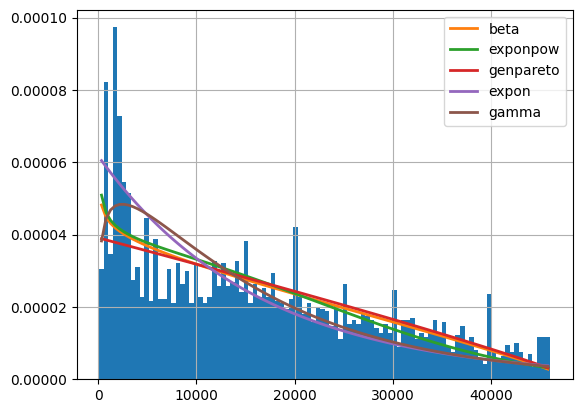

In [29]:
f.summary()

/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:6554: RuntimeWarning: overflow encountered in divide
  return np.sum((1 + np.log(shifted/scale)/shape**2)/shifted)


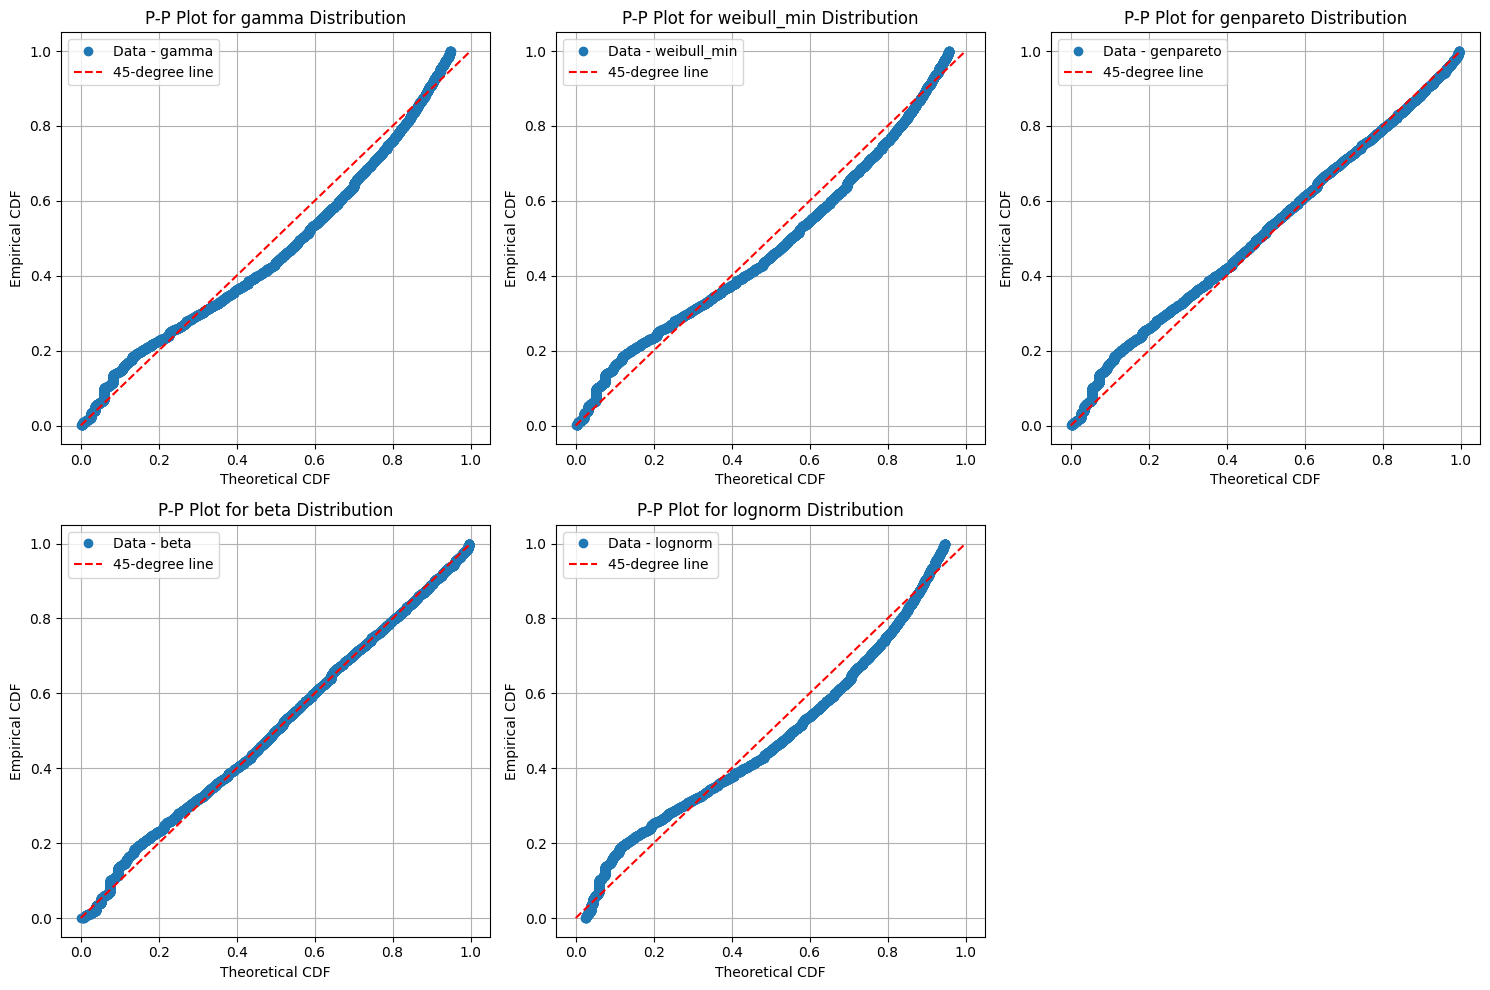

In [30]:


data = df_lv['Amount']

# List of distributions to plot P-P plots for
distributions = ['gamma', 'weibull_min', 'genpareto', 'beta', 'lognorm']

# Generate the P-P plots
get_pp_fit(data, distributions)



from the above pp plt we can see that **beta distribution fits quite well to the body.**

/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:6554: RuntimeWarning: overflow encountered in divide
  return np.sum((1 + np.log(shifted/scale)/shape**2)/shifted)


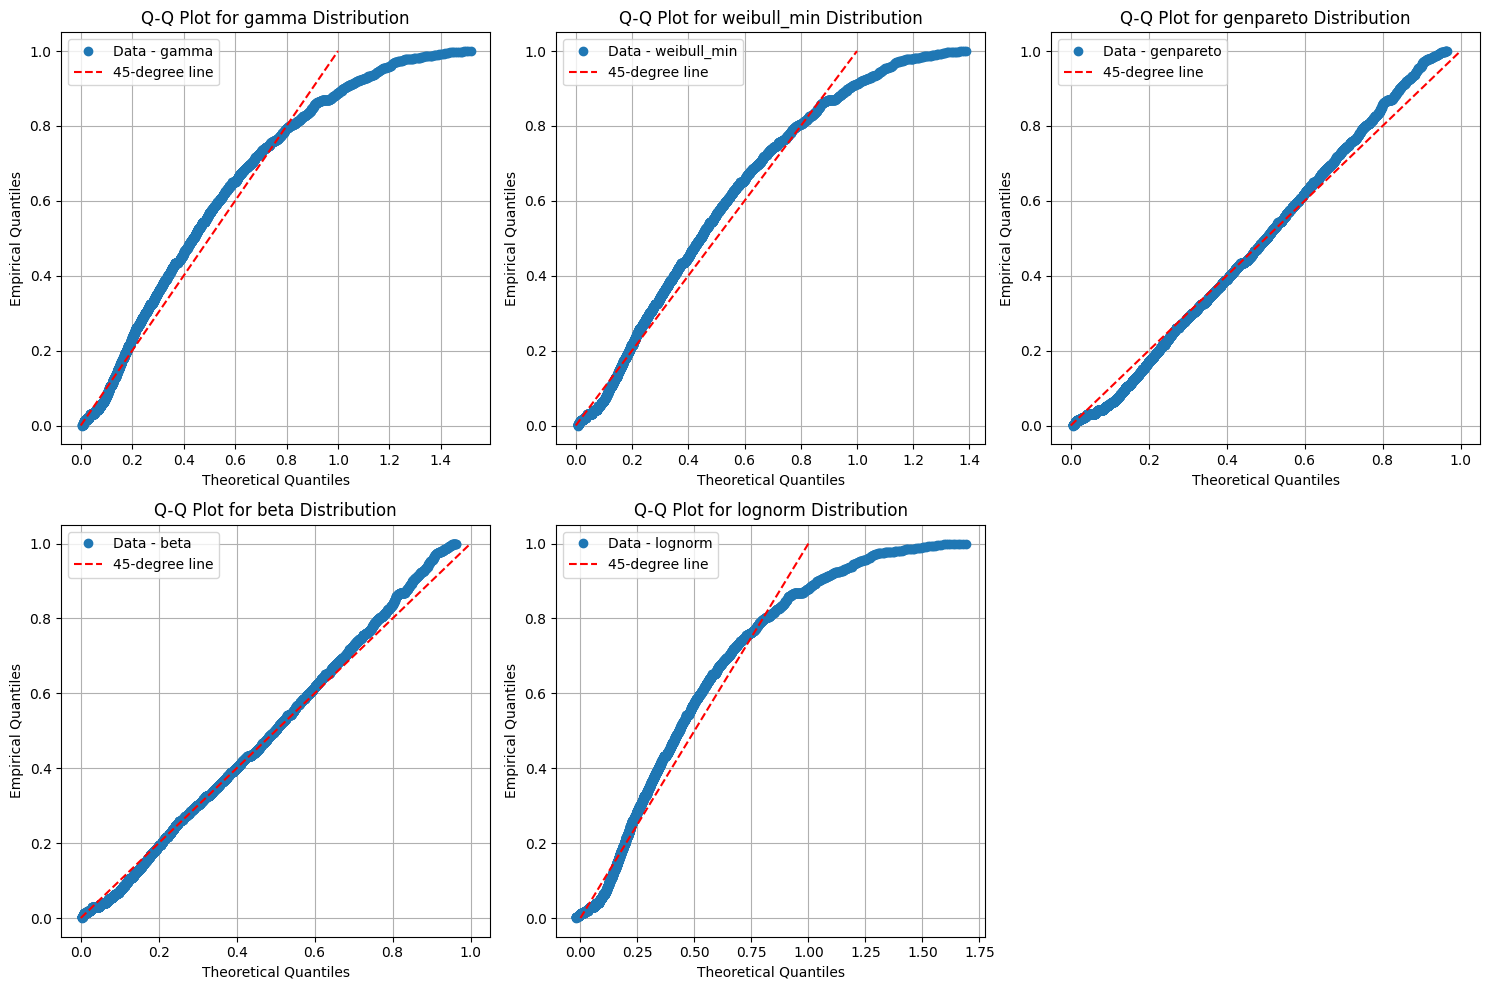

In [31]:

data = df_lv['Amount']

# List of distributions to plot Q-Q plots for
distributions = ['gamma', 'weibull_min', 'genpareto', 'beta', 'lognorm']

# Generate the Q-Q plots
get_qq_fit(data, distributions)


This QQ plot also shows that beta is the best fitted distibution to the lower values of claim amount.

Conclusion :  Beta distribution is best fitted to the distribution of the lower values
---

Fitting the valid distrubtion to the HV dataset

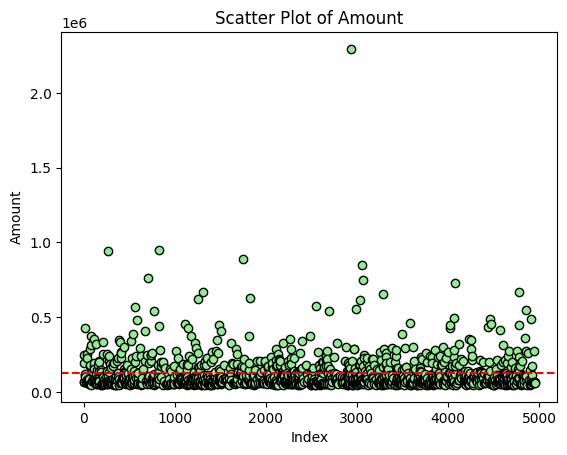

In [32]:
plt.axhline(y=df_hv['Amount'].mean(), color='red', linestyle='--', label='Mean Amount')
plt.scatter(df_hv.index, df_hv['Amount'], edgecolor = 'black', color ='lightgreen')
plt.xlabel('Index')
plt.ylabel('Amount')
plt.title('Scatter Plot of Amount')
plt.show()

by looking above we can see that some values of higher claim amount are more deviated from means. but we can't tell anything about the outliers by looking at this only

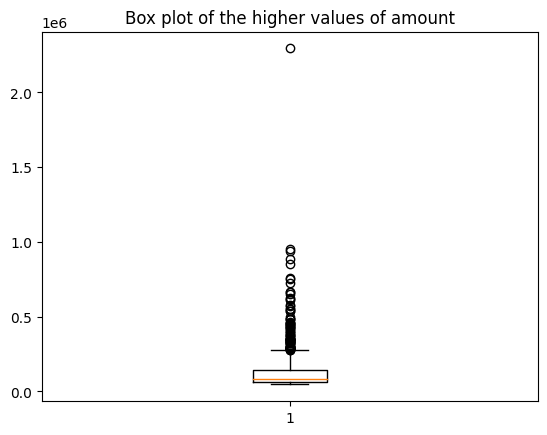

In [33]:
plt.boxplot(df_hv['Amount'])
plt.title("Box plot of the higher values of amount")
plt.show()

Here we can see that there are mony points that lies abot the 15x of the interquartile range also now we can say that the point at maximum height is an outlier.

Lognorm tranformation of the Higher values of the claim amount.


In [34]:
Hv_LN = pd.DataFrame(df_hv['Amount'].apply(np.log))
Hv_LN

,Amount
3,11.077022
4,12.409013
8,12.161117
10,11.139976
13,11.631286
...,...
4938,11.056714
4940,12.520197
4941,11.031254
4952,11.141151


as we can see the hv data set have uniformy disrtibuted so we have to do lognorm transformation of this.

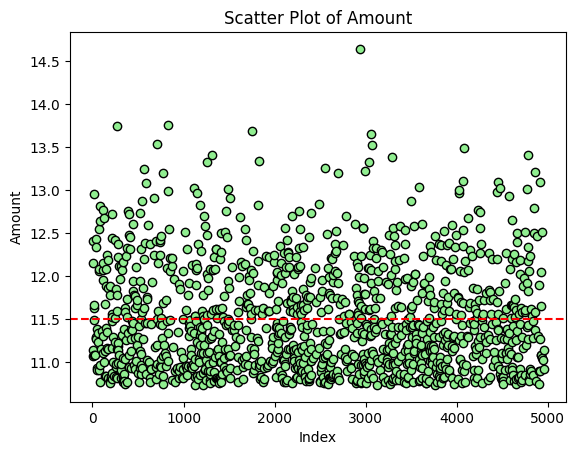

In [35]:
plt.axhline(y=Hv_LN['Amount'].mean(), color='red', linestyle='--', label='Mean Amount')
plt.scatter(Hv_LN.index, Hv_LN['Amount'], edgecolor = 'black', color ='lightgreen')
plt.xlabel('Index')
plt.ylabel('Amount')
plt.title('Scatter Plot of Amount')
plt.show()

here we can see those point that are much deviated from the mean values are now withing the acceptable limits. and the outlier that we discussed earlier is clearly be shown at the top.

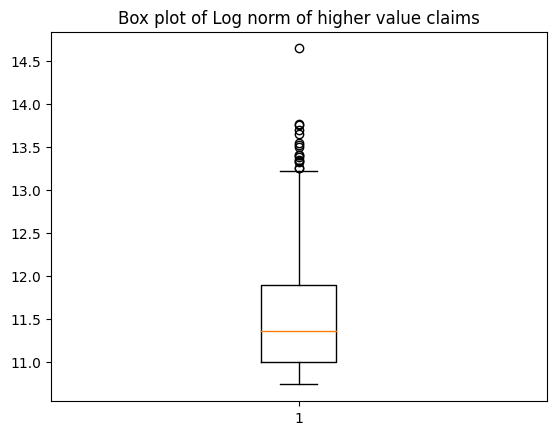

In [36]:
a = plt.boxplot(Hv_LN['Amount'])
plt.title("Box plot of Log norm of higher value claims")
plt.show()

This box plot validate that there is one outlier definitely and some points are that are not in the range of 1.5x of inter quartile range.


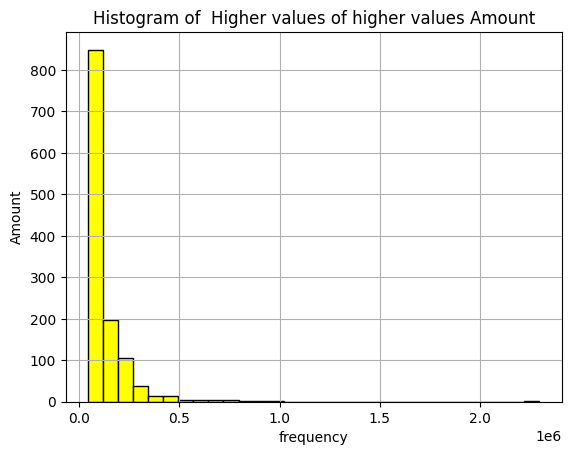

In [37]:
df_hv.hist(bins= 30 , color = 'yellow', edgecolor = 'black')
plt.ylabel('Amount')
plt.xlabel('frequency')
plt.title('Histogram of  Higher values of higher values Amount')
plt.show()

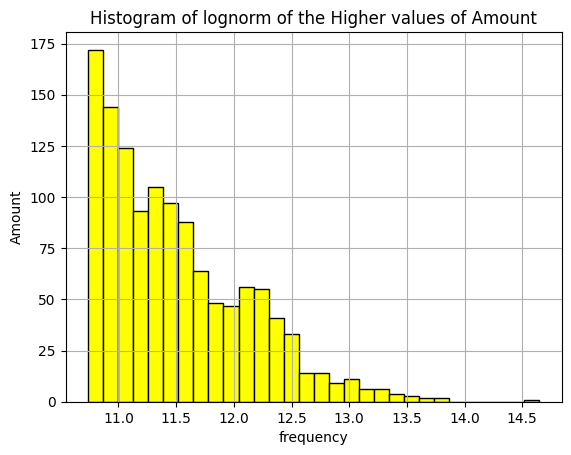

In [38]:
Hv_LN.hist(bins= 30 , color = 'yellow', edgecolor = 'black')
plt.ylabel('Amount')
plt.xlabel('frequency')
plt.title('Histogram of lognorm of the Higher values of Amount')
plt.show()

In [39]:

f = Fitter(df_hv['Amount'], distributions=['norm', 'expon', 'lognorm', 'gamma', 'beta', 'genpareto', 't', 'uniform', 'weibull_min', 'cauchy', 'laplace', 't'])

# Step 2: Fit the data
f.fit()

# # Step 3: Print summary of best fits
# f.summary()

# Step 4: Get the best distribution based on the fit
best_fit = f.get_best()
print("Best fit distribution:", best_fit)

# Step 5: Plot the probability density function (PDF) of the best fit distribution
# f.plot_pdf()


Best fit distribution: {'lognorm': {'s': 1.367182870719701, 'loc': 45390.640997348906, 'scale': 35840.77588214208}}


These are the top 5  best fitted  distribution
---

/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
lognorm,4.848572e-12,3558.155693,3573.521872,inf,0.042538,2.192564e-02
weibull_min,7.194241e-12,4276.142767,4291.508947,inf,0.023181,5.109502e-01
genpareto,9.440520e-12,3948.079579,3963.445759,inf,0.057299,5.613108e-04
beta,1.814691e-11,4779.532692,4800.020931,inf,0.063759,8.025419e-05
expon,3.138537e-11,5105.727118,5115.971238,inf,0.119377,7.647842e-16


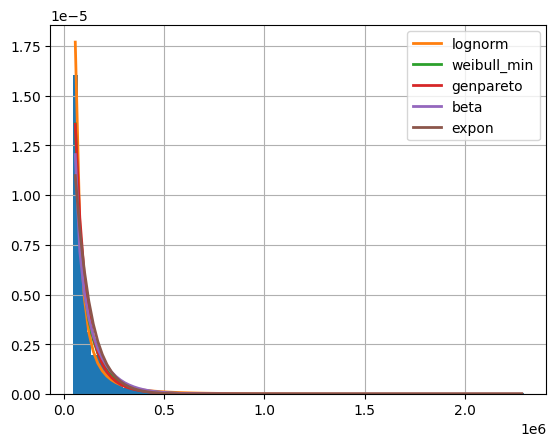

In [40]:
f.summary()

/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:6554: RuntimeWarning: overflow encountered in divide
  return np.sum((1 + np.log(shifted/scale)/shape**2)/shifted)


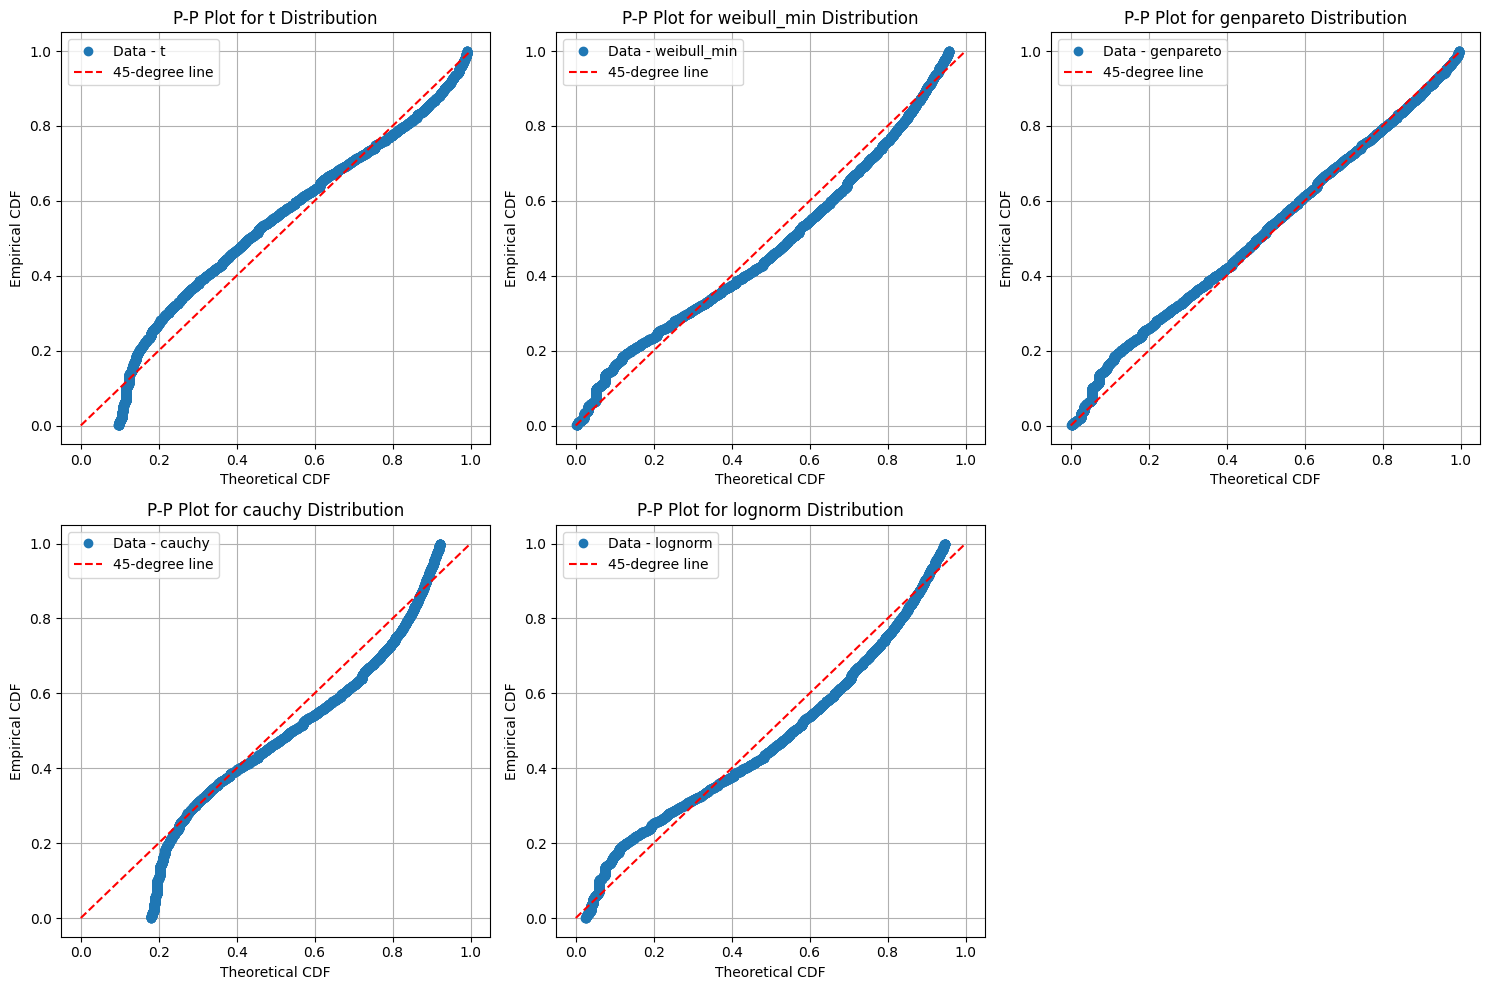

In [41]:

data = df_lv['Amount']

# List of distributions to plot P-P plots for
distributions = ['t', 'weibull_min', 'genpareto', 'cauchy', 'lognorm']

# Generate the P-P plots
get_pp_fit(data, distributions)


Here we can see that general pareto follows 45degree angle line very well.

/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:6554: RuntimeWarning: overflow encountered in divide
  return np.sum((1 + np.log(shifted/scale)/shape**2)/shifted)


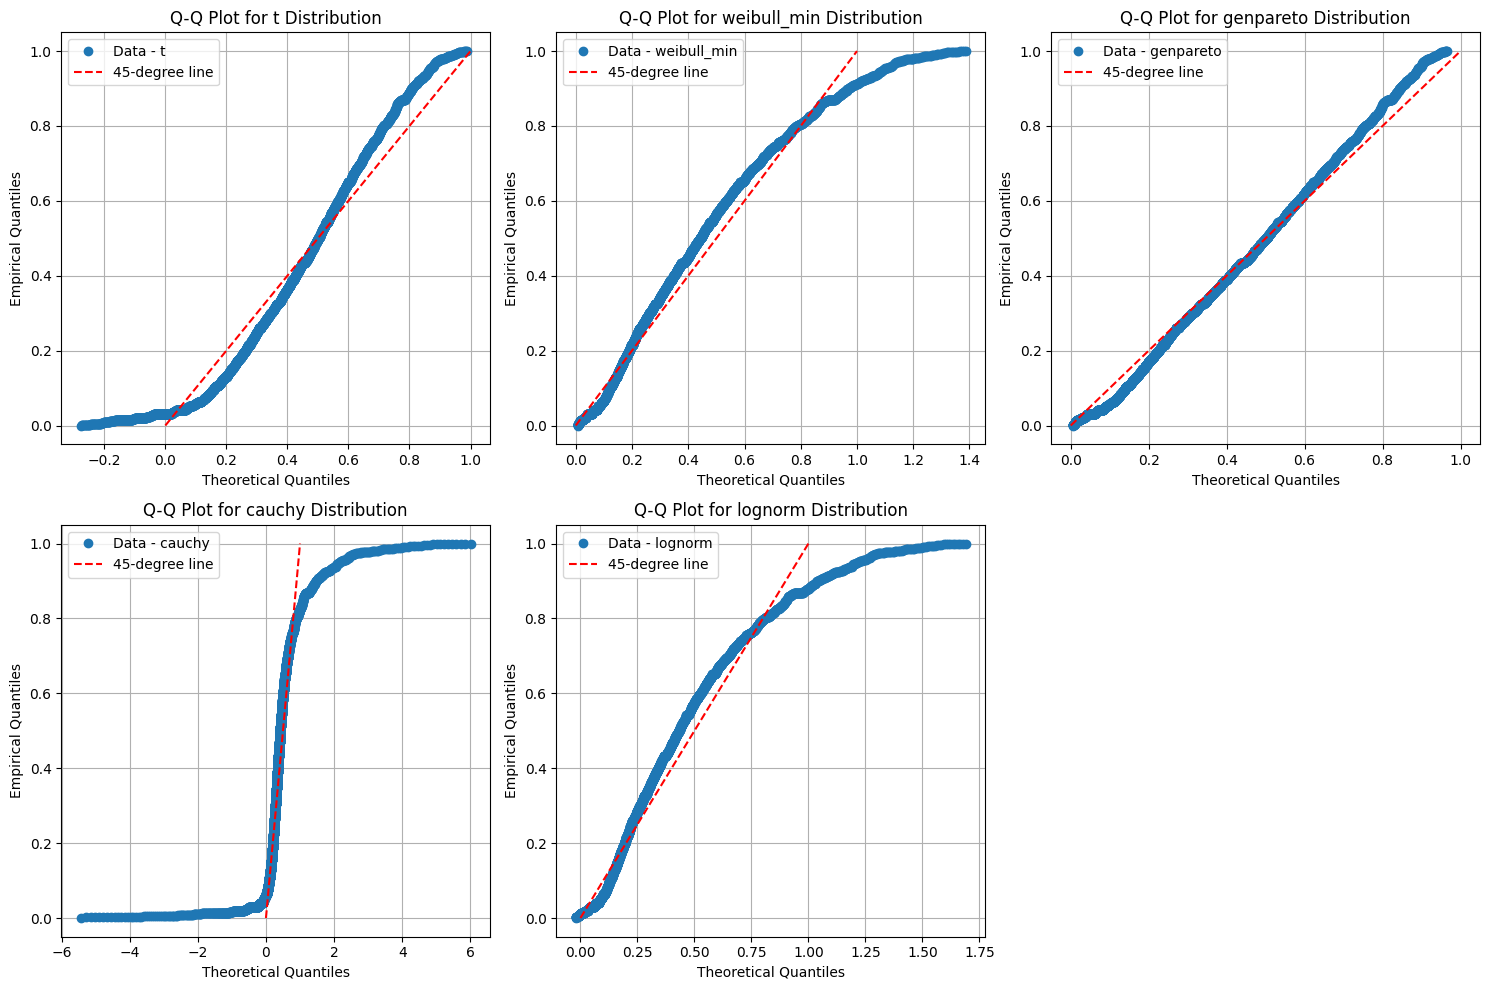

In [42]:

data = df_lv['Amount']

# List of distributions to plot Q-Q plots for
distributions = ['t', 'weibull_min', 'genpareto', 'cauchy', 'lognorm']

# Generate the Q-Q plots
get_qq_fit(data, distributions)


we can see above that qq plot is also good of general pareto.

Conclusion: General pareto is the best distribution that can be fit to the higher values of the the claims  
---
